In [1]:
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'data/data_for_eda.csv')

In [4]:
import pickle
file = open("./utils/skill_dictionary",'rb')
skills_dict = pickle.load(file)
file.close()

In [5]:
skill_df = pd.DataFrame.from_dict(skills_dict, orient='index', columns=['Frequency'])

top_skills = skill_df.sort_values(by='Frequency', ascending=False)[:10]
top_skills['skills'] = top_skills.index
top_skills.set_index(np.arange(0,len(top_skills)), inplace=True)

In [6]:
skill_df['skills'] = skill_df.index
skill_df.set_index(np.arange(0, len(skill_df)), inplace=True)

In [7]:
skill_df['States'] = df['State']

In [8]:
df[(df['avg_yearly_sal'] != 0) & (df['Job_position'] != 'na')][['Job_position', 'avg_yearly_sal']].sort_values(by=['avg_yearly_sal'], ascending=False)

,Job_position,avg_yearly_sal
1700,php,10200000.0
2234,java,9600000.0
593,app,6000000.0
890,stack nodejs docker sql,5285448.0
1361,mobile app,4440000.0
...,...,...
1952,flutter,18000.0
266,java,16500.0
36,nlp ai,12000.0
859,nlp ai,12000.0


In [9]:
text = "The IT Administrator / Software Engineer will join a thriving team as someone who implements, manages, and monitors IT solutions in Microsoft Azure and works on the storage, governance, identity, virtual networks, and compute in a cloud environment. You will support internal staff as well as external clients while ensuring maximum performance and security of our apps and IT infrastructure. Responsibilities: Automate, deploy, configure, and manage Azure resources Create, configure, and manage Azure App Services inside ASE and stand-alone Implement and manage databases Configure resources for scale and performance Implement and maintain a Secure Environment Monitor and Optimize Operational Resources Plan and Implement High Availability and Disaster Recovery (HADR) Deploy, secure, and manage storage, including Azure Blob Storage Manage, Maintain, and test backups Identity management and governance Application integration Manage Azure Active Directory (Azure AD) Manage role-based access control (RBAC) Manage subscriptions Monitor health and performance of Azure resources Continually strengthen and protect the computing environment Regular and routine security assessment of cloud resources, including servers, storage, SQL databases, networks, applications, and workloads that are running in Azure. Serve on Security Incident Response Team Quality Assurance Prepare and present daily, weekly, and monthly reports of production environment variances, summaries, status, and recommendations Sales and Customer Support Assist onboarding team with customer implementation process, including participating on customer call Required Experience and Training 5+ years relevant experience in systems administration 4+ years experience Linux and Windows server administration Ability to administer virtual machines on the cloud Experience in Kubernetes and Docker Experience with storage solutions for virtual database files, application data, etc. Experience securing data from unauthorized access Experience ensuring data backups for restoration Experience maintaining corporate compliance and configuring archival storage Expertise in Microsoft security controls Experience working with PowerShell Programming skills in at least one language, preferably PHP Experience installing, maintaining, and troubleshooting MySQL databases; Oracle/MSSQL is a plus. Experience installing, maintaining, and troubleshooting Elasticsearch cluster a plus. Bachelor’s Degree Preferred Experience Prior experience in Google Cloud or AWS a plus Experience in a corporate environment Experience working from home"

In [10]:
import re

In [14]:
with open('utils/skills.txt') as f:
    skills = f.read()
f.close()
skills = skills.split(',')
x = list(set(re.findall(r"(?=(\b" + '\\b|\\b'.join(skills) + r"\b))", text)))
check = list(df['Job_position'].unique())
list(set(x)&set(check))

['security', 'database', 'server', 'systems', 'cloud']

In [15]:
x

['security', 'database', 'server', 'systems', 'cloud']

['database', 'systems', 'cloud', 'server', 'security']

In [17]:
temp = df[df['avg_yearly_sal'] > 0]

In [18]:
check_df = pd.DataFrame(columns=['skill', 'avg_yearly_sal'])
for i in x:
    print(i, temp[temp['Job_position'] == i]['avg_yearly_sal'].values.mean())
    check_df = check_df.append(pd.Series({'skill': i, 'avg_yearly_sal': temp[temp['Job_position'] == i]['avg_yearly_sal'].values.mean()}), ignore_index=True)

security 1000000.0
database 434612.28571428574
server 1200000.0
systems 2500000.0
cloud 920000.0


In [94]:
check_df.sort_values(by = 'avg_yearly_sal', inplace=True)

In [95]:
check_df

,skill,avg_yearly_sal
0,database,434612.285714
2,cloud,920000.0
4,security,1000000.0
3,server,1200000.0
1,systems,2500000.0


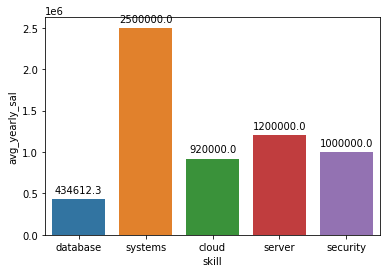

In [91]:
# plt.figure(figsize=(10,12))
splot = sns.barplot(y = 'avg_yearly_sal', x='skill', data=check_df)
for p in splot.patches:
                   splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
# plt.show(block=False)   